# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

（v3 updated：）

评审老师好，非常感谢详细的评审，已经修改，请审阅。
另外，还有个额外问题：
- 对于 fbeta 中的 beta值，请问怎么根据场景来确定。在实际工作中，需要进行网格搜索多尝试几个么？还是数据集定义了使用beta多少就是多少？（实际竞赛时会指定beta么？）


（v2 updated：）

评审老师好：

已经按照反馈完成修改，请审阅，几点说明如下：
- 第一版的代码，不知道为什么出了乌龙，本来已经用了LabelEncoder做了income的处理了，跑着也不报错。已经又检查了一遍，并提供html版本。后续也不会报错shape不对。
- randomstates全部添加了，百分比，傻白甜预测也都做了修改。
- 提供的资料特别好，感谢：
    - https://cloud.tencent.com/developer/article/1064119 机器学习场景
    - https://scikit-learn.org/stable/modules/feature_selection.html feature selection
    - https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons pro and cons

非常感谢，
老孟

（v1）评审老师好：

辛苦评审老师审阅我的项目。在做的过程中遇到一些问题请教下：
- （Q）：数据形状经过ln转换后呈现了正态图形，但0那里的数量还是很高，用不用回过来对0的数据做处理（比如丢弃）？反馈：不用处理。
- （Q）：项目的最后，我做了逻辑回归clf和best_clf的结果对比，发现best_clf泛化性能更好。请问在实际工作中，可以这样防止过拟合和欠拟合么，还是过拟合和欠拟合是模型的特征，要根据分析目的选择更加重要。反馈：使用GridSearchCV
- Q：项目后面有一部分是寻找最佳5个feature进行预测和全feature预测的比较。还让比较了自己的想法和数据计算结果的区别。请问下这个选择feature的过程自己的直觉在实际工作中重要么，因为毕竟可以计算出排名，是不是就老实计算就可以了，有考直觉解决的案例么？反馈：计算特征重要性可以帮助我们更好地理解问题，并且避免过拟合。
- Q：对于监督学习的模型选择问题，查了些资料还是比较费劲，感觉选择合适的模型非常重要。请问有没有比较系统深入的资料推荐。

非常感谢，
老孟

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [114]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
data.head(1)

age   workclass education_level  education-num  marital-status  \
0   39   State-gov       Bachelors           13.0   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male        2174.0           0.0   

   hours-per-week  native-country income  
0            40.0   United-States  <=50K

### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [115]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = data[data.income == '>50K'].shape[0]

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = data[data.income == '<=50K'].shape[0]

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = 100 * n_greater_50k / n_records

# 打印结果
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
# print ("Percentage of individuals making more than $50,000: {:.2f}".format(greater_percent))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 获得特征和标签
`income` 列是我们需要的标签，记录一个人的年收入是否高于50K。 因此我们应该把他从数据中剥离出来，单独存放。

In [116]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

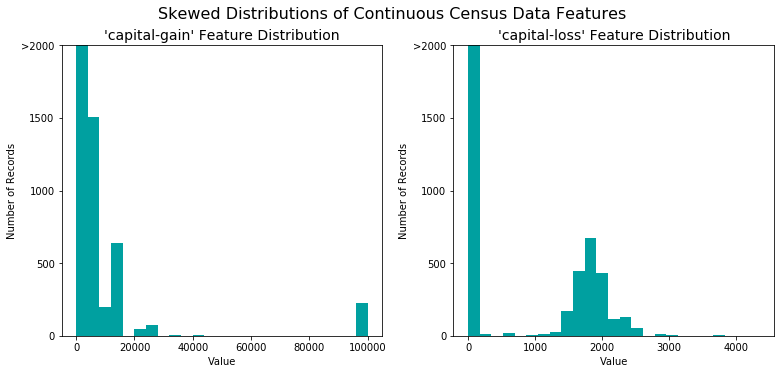

In [117]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

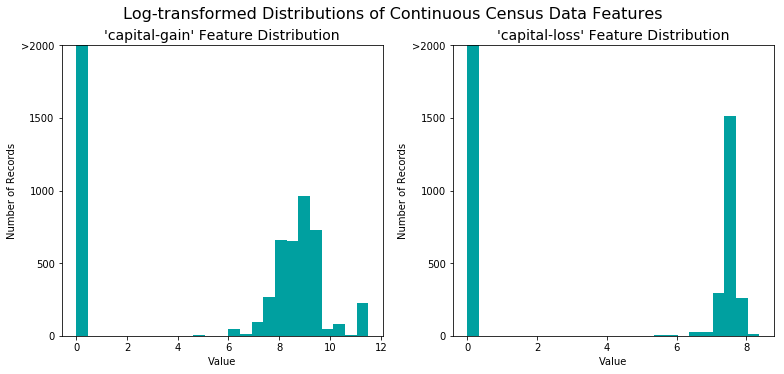

In [118]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed = True)
# （Q）转换后因为0的数值还是很高，用不用回过来对0的数据做处理

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

In [119]:
import warnings
warnings.filterwarnings('ignore')

# 上面是消除所有 warnings的方法，在最后提交时候应该加上
# 之前的话看warning还是能发现些问题的
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
features_raw.head(1)

age   workclass education_level  education-num  marital-status  \
0  0.30137   State-gov       Bachelors            0.8   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male       0.02174           0.0   

   hours-per-week  native-country  
0        0.397959   United-States

### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [120]:
from sklearn.preprocessing import LabelEncoder

# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值
# 光使用get_dummies会建立两列，但y作为结果只需要一列
# 需要删掉一列，保留 >= 50 等于1的列（与预测方向一致）
# 这种情况无法处理income为3类的情况，drop不用，直接使用后面的LabelEncoder
# income1 = pd.get_dummies(income_raw)
# income2 = income1['>50K']
# 反馈建议的办法：income = [0 if x == '<=50K' else 1 for x in income_raw]

# 也可以使用labelencoder处理
# 法三、使用LabelEncoder() 
# LabelBinarizer()据说也可以，后续研究
income =pd.Series(LabelEncoder().\
                  fit_transform(income_raw).reshape(income_raw.shape[0]))
#print(income.head(n=23))

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# 移除下面一行的注释以观察编码的特征名字
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

运行下面的代码单元来完成切分。

In [121]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0,
                                                    stratify = income)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。四种算法包含一个*天真的预测器* 和三个你选择的监督学习器。

### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

### 问题 1 - 天真的预测器的性能

通过查看收入超过和不超过 \$50,000 的人数，我们能发现多数被调查者年收入没有超过 \$50,000。如果我们简单地预测说*“这个人的收入没有超过 \$50,000”*，我们就可以得到一个 准确率超过 50% 的预测。这样我们甚至不用看数据就能做到一个准确率超过 50%。这样一个预测被称作是天真的。通常对数据使用一个*天真的预测器*是十分重要的，这样能够帮助建立一个模型表现是否好的基准。 使用下面的代码单元计算天真的预测器的相关性能。将你的计算结果赋值给`'accuracy'`, `‘precision’`, `‘recall’` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

*如果我们选择一个无论什么情况都预测被调查者年收入大于 \$50,000 的模型，那么这个模型在**验证集上**的准确率，查准率，查全率和 F-score是多少？*  


In [124]:
# v3更新，v2虽然修改成功但算的是训练集而不是测试集
# 不能使用scikit-learn，你需要根据公式自己实现相关计算。
# 函数化
## 如果对val做比较的话，直接用y_val比较
## 这是因为前面数据对数据做了处理拆分了income出来
## 调整下在不能拆分的情况下也能处理
## 因为in检查的是str，所以要求check的输入也是字符：
## naive_prediction(data,'income')
## 如果想要去掉单引号，需要参考这个：
## https://stackoverflow.com/questions/582056/getting-list-of-parameter-names-inside-python-function
## 因为两种情况下的输入不同，所以用了try、except的方式处理
## 实际中应该避免这种情况，要求输入数据为统一格式

def naive_prediction(data,check):
    try:
        check in data.columns
    except AttributeError:
        TP = y_val[y_val.values == 1].shape[0]
        TN = 0
        FP = y_val.shape[0] - y_val[y_val.values == 1].shape[0]
        FN = 0
        print ("Naive Predictor on validation data:")
    else:
        TP = data[data.income == '>50K'].shape[0]
        TN = 0
        FP = data.shape[0] - data[data.income == '>50K'].shape[0]
        FN = 0
        print ("Naive Predictor on full data:")
    finally:
        ALL = data.shape[0]
        ## all_points 和 TP + FN 等价 - 不要做这种变换，要考虑到别的情况
        #TODO： 计算准确率
        accuracy =  TP / ALL
        # TODO： 计算查准率 Precision
        precision = TP / (TP+FP)
        # TODO： 计算查全率 Recall
        recall = TP / (TP+TN)
        # TODO： 使用上面的公式，设置beta=0.5，计算F-score
        beta = 0.5
        fscore = (1+pow(beta, 2))*precision*recall/((pow(beta,2)*precision)+recall)

        # 打印结果
        # 自带的会在后面4行出现缩进，没研究明白，拆开成单行就好了（强迫症，，，）
        '''print ("Naive Predictor on validation data: \n \
            Accuracy score: {:.4f} \n \
            Precision: {:.4f} \n \
            Recall: {:.4f} \n \
            F-score: {:.4f}".format(accuracy, precision, recall, fscore))'''


        print ("Accuracy score: {:.4f}".format(accuracy))
        print ("Precision: {:.4f} ".format(precision))
        print ("Recall: {:.4f} ".format(recall))
        print ("F-score: {:.4f} ".format(fscore))
        # （Q）这里beta为什么设定为0.5，需不需要进行额外论证，论证的参考一般是什么，请老师给点建议。

print(naive_prediction(data,'incomes'))
print(naive_prediction(y_val,'incomes'))

Naive Predictor on full data:
Accuracy score: 0.2478
Precision: 0.2478 
Recall: 1.0000 
F-score: 0.2917 
None
Naive Predictor on validation data:
Accuracy score: 0.2478
Precision: 0.2478 
Recall: 1.0000 
F-score: 0.2917 
None


In [125]:
##  archive
## v2虽然修改成功但算的是所有数据而不是测试集
## data是所有数据
#不能使用scikit-learn，你需要根据公式自己实现相关计算。

g50_pos = data[data.income == '>50K'].shape[0]
g50_neg = 0
l50_pos = data.shape[0] - data[data.income == '>50K'].shape[0]
l50_neg = 0
all_points = data.shape[0]

TP = data[data.income == '>50K'].shape[0]
g50_neg = 0
l50_pos = data.shape[0] - data[data.income == '>50K'].shape[0]
l50_neg = 0
all_points = data.shape[0]

#TODO： 计算准确率
accuracy =  g50_pos / all_points

# TODO： 计算查准率 Precision
precision = g50_pos / (g50_pos + l50_pos)

# TODO： 计算查全率 Recall
recall = g50_pos / (g50_pos + g50_neg)

# TODO： 使用上面的公式，设置beta=0.5，计算F-score
beta = 0.5
fscore = (1+pow(beta, 2))*precision*recall/((pow(beta,2)*precision)+recall)

# 打印结果
# 自带的会在后面4行出现缩进，没研究明白，拆开成单行就好了（强迫症，，，）
'''print ("Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore))'''

print ("Naive Predictor on validation data:")
print ("Accuracy score: {:.4f}".format(accuracy))
print ("Precision: {:.4f} ".format(precision))
print ("Recall: {:.4f} ".format(recall))
print ("F-score: {:.4f} ".format(fscore))
# （Q）这里beta为什么设定为0.5，需不需要进行额外论证，论证的参考一般是什么，请老师给点建议。

Naive Predictor on validation data:
Accuracy score: 0.2478
Precision: 0.2478 
Recall: 1.0000 
F-score: 0.2917 


## 监督学习模型
### 问题 2 - 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）

从上面的监督学习模型中选择三个适合我们这个问题的模型，并回答相应问题。

## / Logistic回归（LogisticRegression）
1. 描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）
    1. 解决分类回归问题
        1. 比如这个[/是否会办金融产品的预测/](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
        2. 这里对于逻辑回归的解释也很清楚：Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
    2. 还串到了一个如何用SMOTE解决分类预期差别很大的帖子：http://rikunert.com/SMOTE_explained
    3. 还挖出了RFE，识别无用参数的函数（不用自己去一个一个看决定系数了）后续研究。https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
2. 这个模型的优势是什么？他什么情况下表现最好？
    1. 实现简单，广泛的应用于工业问题上；
    2. 分类时计算量非常小，速度很快，存储资源低；
    3. 便利的观测样本概率分数；
    4. 对逻辑回归而言，多重共线性并不是问题，它可以结合L2正则化来解决该问题；
3. 这个模型的缺点是什么？什么条件下它表现很差？
    1. 当特征空间很大时，逻辑回归的性能不是很好；
    2. 容易欠拟合，一般准确度不太高
    3. 不能很好地处理大量多类特征或变量；
    4. 只能处理两分类问题（在此基础上衍生出来的softmax可以用于多分类），且必须线性可分；
    5. 对于非线性特征，需要进行转换；
4. 根据我们当前数据集的特点，为什么这个模型适合这个问题。
    1. 选用逻辑回归是作为基线，和后面几个比较使用。

## / 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting) ~~Random Forest or~~ AdaBoost
1. 描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）
    1. [/参见这个赌马的例子/](http://www.yorku.ca/gisweb/eats4400/boost.pdf)
        1. background：A horse-racing gambler, hoping to maximize his winnings, decides to create a computer program that will accurately predict the winner of a horse race based on the usual information (number of races recently won by each horse, betting odds for each horse, etc.). To create such a program, he asks a highly successful expert gambler to explain his betting strategy. Not surprisingly, the expert is unable to articulate a grand set of rules for selecting a horse. On the other hand, when presented with the data for a specific set of races, the expert has no trouble coming up with a “rule of thumb” for that set of races (such as, “Bet on the horse that has recently won the most races” or “Bet on the horse with the most favored odds”). Although such a rule of thumb, by itself, is obviously very rough and inaccurate, it is not unreasonable to expect it to provide predictions that are at least a little bit better than random guessing. Furthermore, by repeatedly asking the expert’s opinion on different collections of races, the gambler is able to extract many rules of thumb.
        2. problems：In order to use these rules of thumb to maximum advantage, there are two problems faced by the gambler: First, how should he choose the collections of races presented to the expert so as to extract rules of thumb from the expert that will be the most useful? Second, once he has collected many rules of thumb, how can they be combined into a single, highly accurate prediction rule?
2. 这个模型的优势是什么？他什么情况下表现最好？
    1. Adaboost是一种有很高精度的分类器。
    2. 可以使用各种方法构建子分类器，Adaboost算法提供的是框架。
    3. 当使用简单分类器时，计算出的结果是可以理解的，并且弱分类器的构造极其简单。
    4. 简单，不用做特征筛选。
    5. 不易发生overfitting。
3. 这个模型的缺点是什么？什么条件下它表现很差？
    1. 对outlier比较敏感
4. 根据我们当前数据集的特点，为什么这个模型适合这个问题。
    1. 课程中讲解的第一个集成方法，熟练一下。
    2. 需要对异常值做额外检查。

## / 支撑向量机 (SVM)
1. 描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）
    1. 其实分类问题都通用（数据量不巨大时），比如这个里面提到的[/男生女生归类问题/](Using this algorithm, we intend to build a robot which can identify whether a person is a Male or a Female.)。[/还有一篇SVC的分析/](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
2. 这个模型的优势是什么？他什么情况下表现最好？
    1. 可以解决高维问题，即大型特征空间；
    2. 能够处理非线性特征的相互作用；
    3. 无需依赖整个数据；
    4. 可以提高泛化能力；
3. 这个模型的缺点是什么？什么条件下它表现很差？
    1. 当观测样本很多时，效率并不是很高；
    2. 对非线性问题没有通用解决方案，有时候很难找到一个合适的核函数；
    3. 对缺失数据敏感；
4. 根据我们当前数据集的特点，为什么这个模型适合这个问题。
    1. 因为数据量不是很多，所以使用SVM求解出比较精确的答案。

### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [126]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    # 函数的sample输入是根据输入的sample进行抽取作为样本进行统计
    # Q1 代码中要求的是直接slice，会不会用random模拟会比较平均？
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在验证集上的预测值
    # 然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score( y_val, predictions_val)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='macro', beta=0.5)
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val, average='macro', beta=0.5)
       
    # 成功
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # 返回结果
    return results

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

In [127]:
y_train.head(1)

11350    0
dtype: int64

In [128]:
y_train.shape

(28941,)

LogisticRegression trained on 289 samples.
LogisticRegression trained on 2894 samples.
LogisticRegression trained on 28941 samples.
SVC trained on 289 samples.
SVC trained on 2894 samples.
SVC trained on 28941 samples.
RandomForestClassifier trained on 289 samples.
RandomForestClassifier trained on 2894 samples.
RandomForestClassifier trained on 28941 samples.


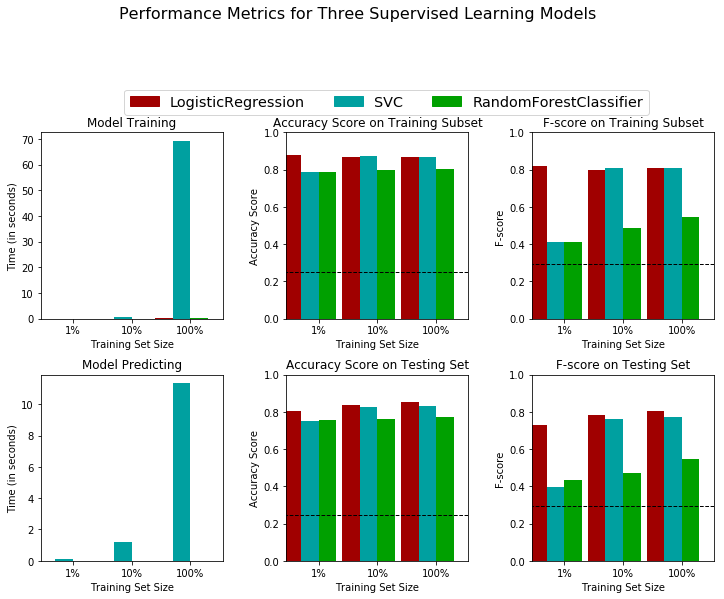

In [129]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO：初始化三个模型
clf_A = LogisticRegression(random_state=42)
clf_B = SVC(random_state=42)
clf_D = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)
# Adaboost使用决策树，和RandomForest做对比
clf_C = RandomForestClassifier(max_depth=2, random_state=42)

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = int(X_train.shape[0])

# 收集学习器的结果
# 增加D之后，可视化会报错，放弃D
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择 *最好的* 模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的 F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段话向 *CharityML* 解释这三个模型中哪一个对于判断被调查者的年收入大于 \$50,000 是最合适的。*             
**提示：**你的答案应该包括评价指标，预测/训练时间，以及该算法是否适合这里的数据。

**回答：**
- 从效果来看逻辑回归和SVC比较优秀。
- 但是从时间来看，SVC消耗太高。
- 最后决定使用逻辑回归进行计算，两种算法的优缺点对比见之前的回答。

### 问题 4 - 用通俗的话解释模型

*用一到两段话，向 *CharityML* 用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答： ** 
- 逻辑回归根据数据集中的各个Feature对目标变量（是否为收入高于50k的人群）作出预测。
- 出了本身是数量的值，还对Feature中的其他分类信息做了独热编码转换，将分类信息转换成了可以计算的，由0、1组成的独热编码。
- 从预测结果看比SVC、随机森林等方法更加准确快速，Accuracy和Fscore达到了0.8。

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [134]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# TODO：初始化分类器
clf = LogisticRegression(random_state=42)

# TODO：创建你希望调节的参数列表
parameters = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'max_iter':[10,100,1000]}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_fit = grid_obj.fit(X_train, y_train)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 汇报调优后的模型
print ("best_clf\n------")
print (best_clf)

# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))

best_clf
------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

Unoptimized model
------
Accuracy score on validation data: 0.8536
F-score on validation data: 0.7182

Optimized Model
------
Final accuracy score on the validation data: 0.8521
Final F-score on the validation data: 0.7150


### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和 F-score 是多少？这些分数比没有优化的模型好还是差？_
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:
 
| 评价指标         |  未优化的模型        | 优化的模型        |
| :------------: |  :---------------: | :-------------: | 
| 准确率          |        0.8536            |       0.8542          |
| F-score        |           0.7182          |         0.7194        |

**回答：**
- 优化后的准确率和F-score得分都上升了

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有 `'feature_importance_'` 属性的scikit学习分类器（例如 AdaBoost，随机森林）。`'feature_importance_'` 属性是对特征的重要性排序的函数。在下一个代码单元中用这个分类器拟合训练集数据并使用这个属性来决定人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，选择每个特征的理由是什么？你会怎样对他们排序？_

In [135]:
features_raw.head()

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   
3  0.493151            Private            11th       0.400000   
4  0.150685            Private       Bachelors       0.800000   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  
0       0.02174           0.0        0.397959   United-States  
1       0.00000           0.0        0.122449   United-States  
2       0.00000           0.0        0.397959   United-States  
3       0.00000           0.0        0.397959   United-States  
4       0.00000           0.0        0.397959            Cuba

**回答：**
- 特征1: education_level 教育程度可能会对人对金钱和计划的态度有影响。
- 特征2: capita-gain 收入可能会和是否接受金融产品相关。
- 特征3: relationship 婚姻关系可能会让人更加注重未来的规划。
- 特征4: workclass 工作不同可能对于人的安全感有影响，从而影响是否接受产品的意愿。
- 特征5: sex 性别可能会决定对于未来的规划习惯。

**v3更新：**
- 根据老师的建议：你的猜测应该只与收入挂钩, 与个人意愿和态度都不应该有关系，这个逻辑很直观, 因为本项目的标签是收入, 而不是其他，可以再仔细阅读项目的"开始"部分哦。
- 预测的不是是否会捐赠，而是income的分类 ，那么 capita-loss 应该选入。而relationship 和 sex 就没有那么相关了。workclass 的话可能在没看到数据时还会选择，因为猜测可能和收入相关。

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

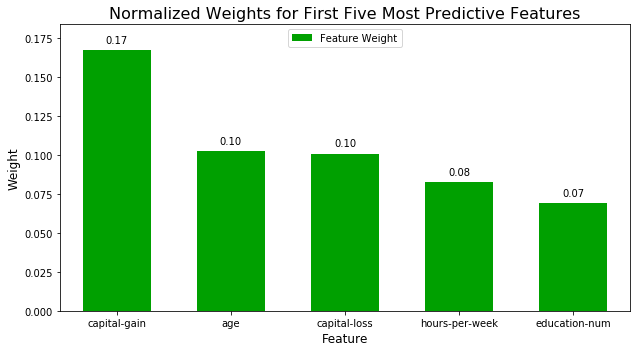

In [136]:
# TODO：导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO：在训练集上训练一个监督学习模型
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators=100)
start = time()
model.fit(X_train, y_train)
end = time()
full_time = end - start
## fit之后在下一步就可以求importances了

# TODO： 提取特征重要性
importances = model.feature_importances_
## 在集成方法中，使用的feature_importances_是继承于base_estimator
## 比如这个例子的说明是 https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

# 绘图
vs.feature_plot(importances, X_train, y_train)

In [137]:
df_imp = pd.DataFrame(importances)
df_imp.sort_index(by = 0, axis = 0,ascending = False)[:5].sum()

0    0.522243
dtype: float64

### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。

- 这五个特征的权重加起来是否超过了0.5?
- 这五个特征和你在**问题 6**中讨论的特征比较怎么样？
- 如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？
- 如果你的选择不相近，那么为什么你觉得这些特征更加相关？

**回答：v3**
- 这五个特征的权重加起来是否超过了0.5?

超过了，0.52

- 这五个特征和你在**问题 6**中讨论的特征比较怎么样？

应该从场景和目的出发，最后用数据验证。
    - capital-gain, capital-loss 预测正确，因为和income直接相关。
    - education-num 预测正确，收入和学历也相关。
    - age 回看的话可以理解，和收入水平也是相关的。
    - hours-per-week 没有考虑到，根据自身经验，互联网企业工资更高但工作时间更长。
    - 翻出一张income和年龄的图：
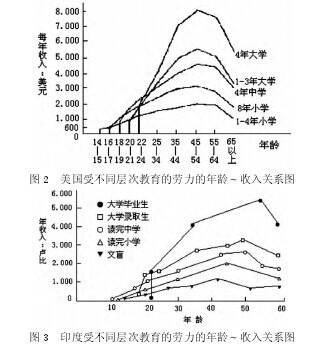

- 如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？

capital-gain （结合新发现的 capital-loss）定义了现金流，所以比较强势。education-num 对一个人的金钱价值观有影响（更倾向于思考未来），age 没有想到，随着年龄的增大，对于投资的关注会有变化。

- 如果你的选择不相近，那么为什么你觉得这些特征更加相关？

sex 和 workclass 这两个没有影响。sex 方面开始感觉男女思维方式会有不同，数据则表示无关。workclass 开始觉得工作职位会影响相关的思维模式，数据也表示无关。

- 特征选择的重要性（v2）：
    - [/感谢老师超赞的例子/](https://www.zhihu.com/question/21094489)
    - [/逻辑回归的温习参考/](http://tech.meituan.com/intro_to_logistic_regression.html)


**回答：-archive-**
- 这五个特征的权重加起来是否超过了0.5?_<br> 
超过了，0.52
- 这五个特征和你在**问题 6**中讨论的特征比较怎么样？
区别在 age 和 hours-per-week 没有考虑到，应该用数据说话
（done_Q增加：经验在数据分析中的作用？感谢反馈，应该从场景和目的出发，最后用数据验证。）
- 如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？
capital-gain （结合新发现的 capital-loss）定义了现金流，所以比较强势。education-num 对一个人的金钱价值观有影响（更倾向于思考未来），age 没有想到，随着年龄的增大，对于投资的关注会有变化。
- 如果你的选择不相近，那么为什么你觉得这些特征更加相关？
sex 和 workclass 这两个没有影响。sex 方面开始感觉男女思维方式会有不同，数据则表示无关。workclass 开始觉得工作职位会影响相关的思维模式，数据也表示无关。

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并**只使用五个最重要的特征**在相同的训练集上训练模型。

In [138]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
start = time()
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
best_time = end - start
## clone 是deep copy，可以加safe参数：
## Clone does a deep copy of the model in an estimator without actually copying attached data. It yields a new estimator with the same parameters that has not been fit on any data.

# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print ("Final Model trained on full features\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced features\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, reduced_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, reduced_predictions, beta = 0.5)))

Final Model trained on full features
------
Accuracy on validation data: 0.8521
F-score on validation data: 0.7150

Final Model trained on reduced features
------
Accuracy on validation data: 0.8143
F-score on validation data: 0.6253


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

In [139]:
accuracy_score(y_val, reduced_predictions) / accuracy_score(y_val, best_predictions)

0.9555627635420045

In [140]:
fbeta_score(y_val, reduced_predictions, beta = 0.5) / fbeta_score(y_val, best_predictions, beta = 0.5)

0.8745363809076254

In [141]:
best_time, full_time, full_time / best_time

(0.09776186943054199, 4.230621099472046, 43.27475654992281)

**回答：v3** 
结论是会考虑，从以下几个方面分析：
- 运行效率方面：
    - 见上面3个代码。
    - accuracy 达到了96%，相差不多。
    - fbeta_score 达到了88%，相差不多。
    - 运行时间相差了34倍。
    - 综上所述，尤其在大规模运用的时候，处理的计算成本和等待时间非常重要。
- 模型选择方面：
    - 此次优化模型选择的是逻辑分类模型：
    - 逻辑分类模型会将众多参数进行转化并且寻找是否相关。
    - 当参数很多的时候，会造成过拟合。
    - 因为有的参数之间本身就是相关的。
    - 所以考虑使用feature_importance找出最相关的参数进行处理。
- 预测效果：
    - 有效的避免的过拟合，在测试集上结果非常接近（见最后一段）。

**回答：** 会考虑，见上面3个代码：
- accuracy 达到了96%，相差不多。
- fbeta_score 达到了88%，相差不多。
- 运行时间相差了34倍。

在考虑到时间因素的情况下，牺牲10%的效果，可以将训练时间缩短到3%，非常划算，在处理时间和资源为考虑条件时十分理想。同时也可以通过尝试5，6，7，8等等多个feature和时间的对比细化到一个更能接受的trade-off。（比如要求fbeta至少达到90%，则还要少量增加一些参数。）

### 问题 9 - 在测试集上测试你的模型

终于到了测试的时候，记住，测试集只能用一次。

*使用你最有信心的模型，在测试集上测试，计算出准确率和 F-score。*
*简述你选择这个模型的原因，并分析测试结果*

In [142]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
#TODO test your model on testing data and report accuracy and F score
best_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
test_predictions = clf.predict(X_test)
best_test_predictions = best_clf.predict(X_test)
# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nUnoptimized Model on Testing\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5)))
print ("\nOptimized Model on Testing\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_test, best_test_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_test, best_test_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on validation data: 0.8536
F-score on validation data: 0.7182

Optimized Model
------
Final accuracy score on the validation data: 0.8521
Final F-score on the validation data: 0.7150

Unoptimized Model on Testing
------
Final accuracy score on the validation data: 0.8458
Final F-score on the validation data: 0.7010

Optimized Model on Testing
------
Final accuracy score on the validation data: 0.8461
Final F-score on the validation data: 0.7018


In [145]:
accuracy_score(y_test, best_test_predictions) / accuracy_score(y_val, best_predictions)

0.9929289652935452

In [146]:
fbeta_score(y_test, best_test_predictions, beta = 0.5) / fbeta_score(y_val, best_predictions, beta = 0.5)

0.9814660310240431

- 选择逻辑回归的原因是速度快、效果好（具体数值见模型选择一节）
- 使用bestestimate的结果很好：
    - accuracy 达到 99%
    - fbeta 达到 98%
- 虽然 Optimized 比 Unoptimized 在训练集的得分低，但是在测试集的得分相当：
    - accuracy，验证集（-0.0013）测试集（0.0001）
    - fbeta，验证集（-0.0047）测试集（-0.0002）
    - 从数值看，Optimized 的在测试集上表现很好，而 Unoptimized 则变化较大，说明有一点过拟合
    -（Q）：是否可以使用寻找 Optimized 方法防止过拟合？

> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。